In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv(
    "/content/drive/MyDrive/Powercast AI/household_power_consumption.txt",
    sep=';',
    low_memory=False
)

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [7]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)

/tmp/ipython-input-1005024584.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [8]:
df['Global_active_power'] = pd.to_numeric(
    df['Global_active_power'],
    errors='coerce'
)

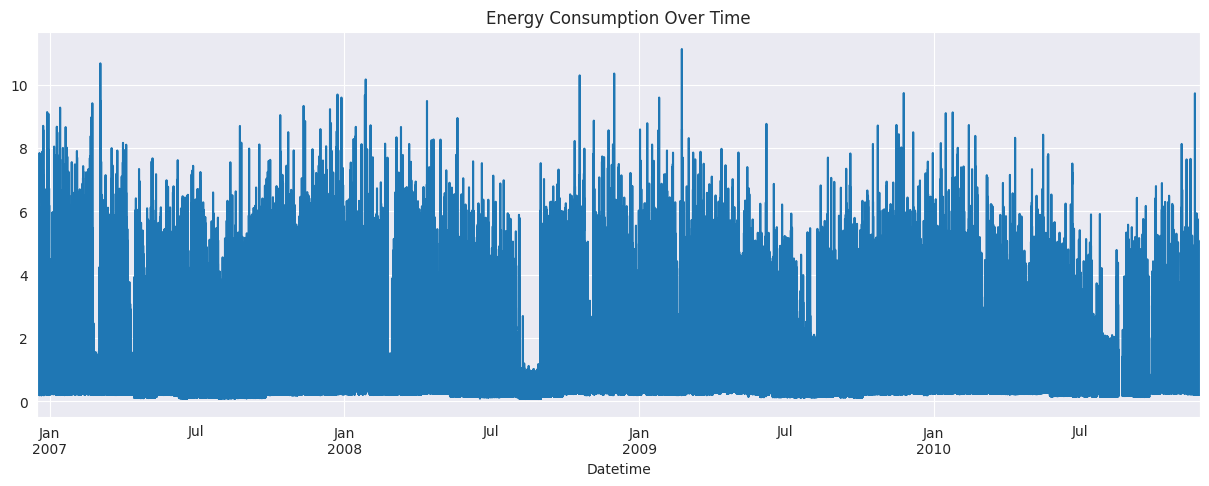

In [9]:
plt.figure(figsize=(15,5))
df['Global_active_power'].plot()
plt.title("Energy Consumption Over Time")
plt.show()

<Axes: xlabel='Datetime'>

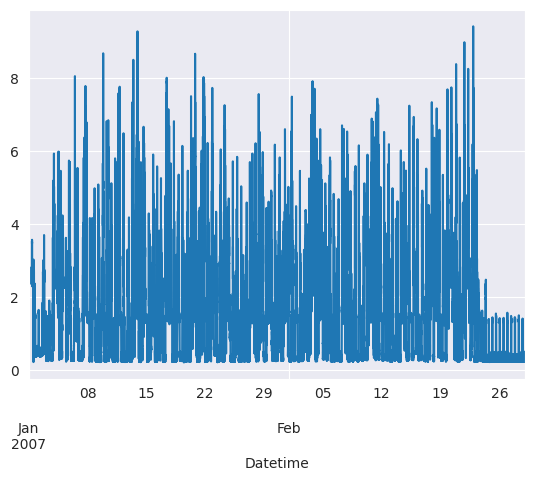

In [10]:
df['Global_active_power']['2007-01':'2007-02'].plot()

In [11]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


## Initial Observations

- The dataset contains household energy consumption measurements recorded over time.
- The Date and Time columns were combined into a Datetime index.
- The Global_active_power column was converted to numeric format.
- Initial visualization shows fluctuations in energy usage over time.
- Missing values are present and will be handled in the next phase.

In [12]:
missing_percentage = df['Global_active_power'].isna().mean() * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 1.25%


In [13]:
df['Global_active_power'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-2757199224.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Global_active_power'].fillna(method='ffill', inplace=True)


In [14]:
df['Global_active_power'].isna().sum()

np.int64(0)

## Missing Value Handling

Missing values were handled using forward fill (ffill), which propagates the last valid observation forward.
This method is suitable for time-series data where consecutive values are correlated.

In [15]:
daily_df = df['Global_active_power'].resample('D').mean()

In [16]:
daily_df.head()

,Global_active_power
Datetime,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


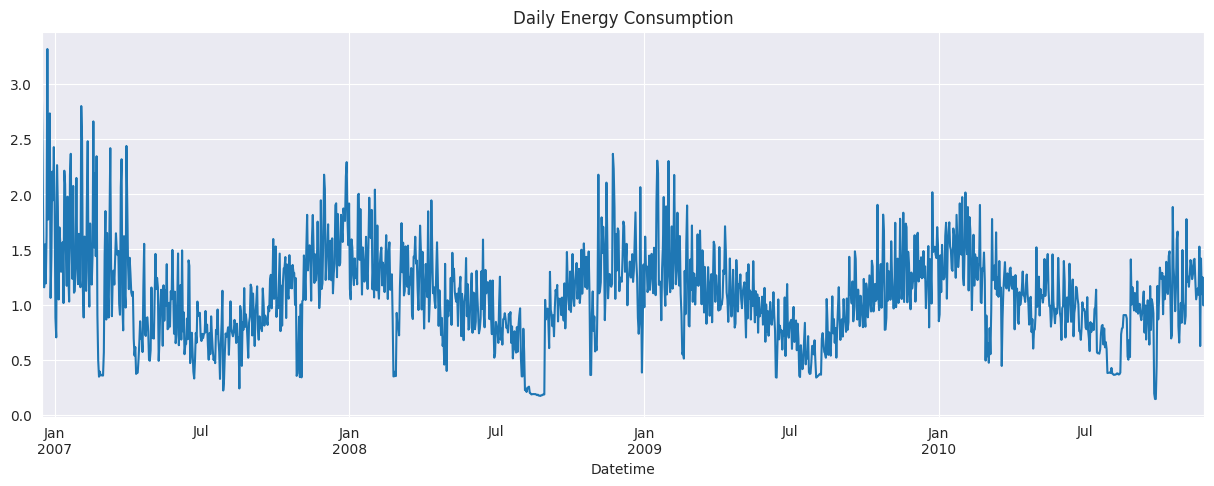

In [18]:
plt.figure(figsize=(15,5))
daily_df.plot()
plt.title("Daily Energy Consumption")
plt.show()

## Daily Resampling

The dataset was resampled to daily averages to:
- Reduce noise
- Improve computational efficiency
- Capture broader consumption patterns

/tmp/ipython-input-3092249425.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = daily_df.resample('M').mean()


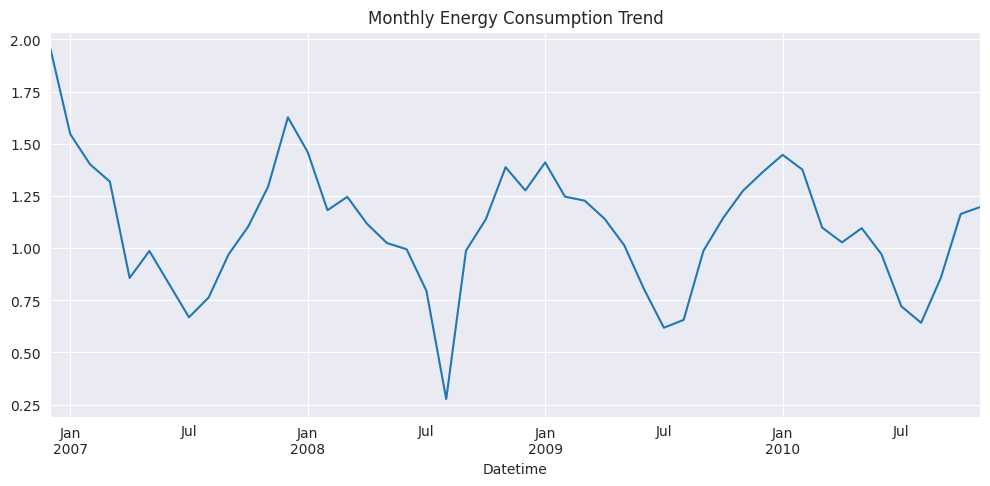

In [19]:
monthly_df = daily_df.resample('M').mean()

plt.figure(figsize=(12,5))
monthly_df.plot()
plt.title("Monthly Energy Consumption Trend")
plt.show()

## Monthly Trend Analysis

Monthly aggregation helps identify seasonality and long-term trends in energy consumption.

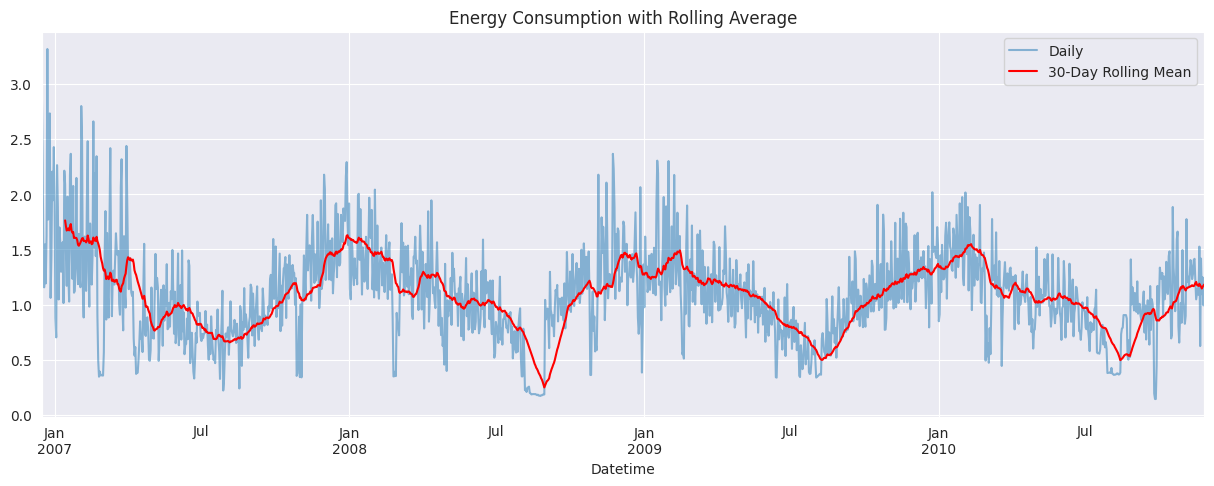

In [20]:
rolling_mean = daily_df.rolling(window=30).mean()

plt.figure(figsize=(15,5))
daily_df.plot(alpha=0.5, label='Daily')
rolling_mean.plot(color='red', label='30-Day Rolling Mean')
plt.legend()
plt.title("Energy Consumption with Rolling Average")
plt.show()

## Trend Smoothing

A 30-day rolling mean was applied to smooth short-term fluctuations and highlight long-term trends.